# 同花顺行业概念信息

In [4]:

import pandas as pd

fpath = r'../../JohnsonUtil\wencai\同花顺板块行业.xls'
thsgn = pd.read_excel(fpath)
thsgn = thsgn.set_index('股票代码')

## 查询信息

In [5]:
thsgn[:1]
thsgn.columns
thsgn.loc['300474.SZ']

股票简称                                                                  景嘉微
现价(元)                                                                  60
涨跌幅(%)                                                              -1.06
主营产品名称                  图形显控领域产品||小型专用化雷达领域产品||小型专业化雷达||图形显控模块产品||加固类产...
所属概念                    显卡;AI芯片;军民融合;雷达;深股通;人工智能;芯片设计;芯片概念;集成电路概念;军工;超...
所属同花顺行业                                                    国防军工-国防军工-军工电子
经营范围                    电子产品（不含电子出版物）、计算机软件的研究、开发、生产和销售及其相关的技术服务，集成电路设...
公司网站                                                 www.jingjiamicro.com
所属概念数量(个)                                                              19
a股流通市值 (元)2023.01.31                                          19023863000
Name: 300474.SZ, dtype: object

# Debug开启

In [6]:

# Delete Jupyter notebook root logger handler
# Set Debug
import logging
import sys

# %matplotlib inline
%matplotlib widget
# stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# # # reload(sys)
# # # sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# stdout = sys.stdout
# sys.path.append('../')
# import JSONData.tdx_data_Day as tdd
# sys.stdout = stdout


mylogger = logging.getLogger()
if len(mylogger.handlers) > 0:
    for ix in mylogger.handlers:
        print("handlers:%s std:%s" % (ix.stream, sys.stdout))
else:
    print("nb not handlers")
#     mylogger.propagate = False
mylogger.setLevel(logging.ERROR)
# mylogger.setLevel(logging.DEBUG)

print("nb:", sys.stderr)
# # Create logger as usual
import nest_asyncio

nest_asyncio.apply()

nb not handlers
nb: <ipykernel.iostream.OutStream object at 0x0000021DE436F5B0>


# TDX多日数据分析

## 定义 TDX-Path

In [7]:
# encoding:utf-8
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"

import sys

import pandas as pd
from pandas import HDFStore

stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# print(stdi, stdo, stde)
# reload(sys)
# sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# print(sys.stdout,sys.stderr,sys.stderr)

# print(stdi, stdo, stde)

# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

In [8]:
sys.path.append("../../")
import os

import JSONData.tdx_data_Day as tdd
# import win_unicode_console
from JohnsonUtil import commonTips as cct
from JSONData import sina_data

os.environ['NUMEXPR_MAX_THREADS'] = '12'

# import nest_asyncio
# nest_asyncio.apply()
# 查阅资料后发现，发现使用 jupyter notebook 环境，其连接着 IPython 内核，而 IPython 内核本身在事件循环上运行，而 asyncio 不允许嵌套其事件​​循环，因此会出现如上图的错误信息。
# nest_asyncio 作为异步操作的补丁而存在，具体内容请参考
# win_unicode_console.disable()
tdx_path = "G:\\tdx_last_df.h5"
sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
sina_d_path = "G:\\sina_data.h5"
sina_dd_path = "G:\\get_sina_all_dd.h5"
# print(stdi, stdo, stde)
sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# # 显示所有列
pd.set_option("display.max_columns", None)
# # 显示所有行
# pd.set_option('display.max_rows', None)
# # 设置 value 的显示长度为 100，默认为 50
# pd.set_option('max_colwidth',100)
# pd.set_option?
# df.columns.tolist()

In [9]:
cct.code_to_symbol_ths('000002')

'000002.SZ'

### 功能定义

In [10]:
def apply_col_toint(df, col=None):
    if col is None:
        co2int = ['boll', 'op', 'ratio', 'fib', 'fibl', 'df2']
    # co2int.extend([co for co in df.columns.tolist()
    #                if co.startswith('perc') and co.endswith('d')])
        co2int.extend(['top10', 'topR'])
    else:
        co2int = col
    co2int = [inx for inx in co2int if inx in df.columns]

    for co in co2int:
        df[co] = df[co].astype(int)

    return df


def readHdf5(fpath, root=None):
    store = pd.HDFStore(fpath, "r")
    print(store.keys())
    if root is None:
        root = store.keys()[0].replace("/", "")
    df = store[root]
    df = apply_col_toint(df)
    store.close()
    return df


def write_code_to_blk(codew, blk='090'):
    block_path = tdd.get_tdx_dir_blocknew() + '%s.blk' % (blk)
    write_blk = 'n'
    write_blk = cct.cct_raw_input("write blk [Y] or [N]:")
    if write_blk == 'y' or write_blk == 'Y':
        hdf5_wri = cct.cct_raw_input(
            "Rewrite code [Y] or append [N](defalut:N):")
        if hdf5_wri == 'y' or hdf5_wri == 'Y':
            append_status = False
        else:
            append_status = True
        if len(codew) > 3:
            cct.write_to_blocknew(block_path, codew, append_status,
                                  doubleFile=False, keep_last=0)
            ("write:%s block_path:%s" % (len(codew), block_path))
        else:
            ("write error:%s block_path:%s" % (len(codew), block_path))


def show_tdx_data(df, codelist=None, market_value='3', col=None):

    columns_ = [
        "name", "category", "close", "percent", 'topR', "lastp1d", "ma5dcum",
        "ma20d", "fib", "fibl", "ra", "ral", "df2", "per1d", "hmax", "lmin",
        "per%sd" % (market_value),
        "perc%sd" % (market_value)]
    if isinstance(df, pd.Series):
        columns_ = [co for co in columns_ if co in df.index]
    else:
        columns_ = [co for co in columns_ if co in df.columns]
    if col is not None:
        columns_.insert(4, col)

    if codelist is None:
        if isinstance(df, pd.Series):
            # print("Count:1")
            temp = df.loc[columns_]
        else:
            print("Count:%s %s" % (df.shape))
            temp = df.loc[:, columns_]
    else:
        temp = df.loc[[x for x in codelist if x in df.index], columns_]
    return temp


def compute_perd_value(df, market_value=3, col="per"):

    # if market_value == None or market_value < "2":
    #     market_value = 3
    # if market_value > 1 and len(df[ df["%s%sd" % (col, market_value)] > 2])   :
    market_value = str(market_value)
    if market_value > str(1):
        temp = df[
            df.columns[
                (df.columns >= "%s1d" % (col))
                & (df.columns <= "%s%sd" % (col, market_value))
            ]
        ]

        df['%s%sd' % (col, market_value)] = temp.T.sum().apply(
            lambda x: round(x, 1))
    else:
        print("market_value <= 1,No Compute")

    return df


def clean_688(df):
    df = df[(~df.index.str.contains("688"))]
    return df


from collections import Counter, OrderedDict


def counterCategory(df):
    top5 = dict()
    if len(df) > 0:
        categoryl = df.category[:20].tolist()
        dicSort = []
        for i in categoryl:
            if isinstance(i, str):
                # dicSort.extend([ co.decode('utf8') for co in i.split(';')])
                dicSort.extend(i.split(';'))
                # cate_list = i.split(';')
                # for co in cate_list:
                #     dicSort.append(to_str(co))
        topSort = Counter(dicSort)
        top5 = OrderedDict(topSort.most_common(5))
        # for i in top5.keys():
        # print(i, top5[i]),
        # print('')
    return top5


def get_runtime_percent(df, perd=None):
    if "percent" not in df.columns and "lastp1d" in df.columns:
        # print('init percent')
        df = df.fillna(0)
        df['percent'] = list(
            map(
                lambda x, y, z: round((x - y) / y * 100, 1)
                if x != y else round((x - z) / z * 100, 1),
                df.close, df.lastp1d, df.lastp2d))
        # df['percent'] = df.apply(lambda x: round((x.close - x.lastp1d) /(x.lastp1d) * 100, 1),axis=1)
    # else:
    #     print('Percent in columns')
    if not perd is None:
        df[perd] = list(map(lambda x, y: round((x + y), 1)
                            if int(y) > 0 else 0, df.perd, df.percent))
    return df


def get_realtime_ratio(df, market='all'):
    if 'ratio' in df.columns:
        df.drop('ratio', axis=1, inplace=True)
    ratio_df = tdd.getSinaJsondf(market)
    df = cct.combine_dataFrame(
        df, ratio_df.ratio, col=None, compare=None, append=False, clean=False)
    return df


def get_ths_info(code):
    code = cct.code_to_symbol_ths(code)
    return thsgn.loc[code]

### 还原Cell输出信息

In [11]:
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

## 初始化 hdf5的tdx数据

In [12]:

market_value = "3"
df = readHdf5(tdx_path)
df = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
df = compute_perd_value(df, market_value, "perc")
df = compute_perd_value(df, market_value, "per")

df = get_realtime_ratio(df)
# df=get_runtime_percent(df)

df = get_runtime_percent(df, "per%sd" % (market_value))

# filter 科创
df = clean_688(df)

df.shape
df[-1:].percent
df[~(df.last6vol > 0)][:10].last6vol
df.ratio[-2:]

['/low_d_60_y_all', '/low_w_180_y_all']


(4447, 119)

code
301078    1.1
Name: percent, dtype: float64

Series([], Name: last6vol, dtype: float64)

code
000539    0.7
301078    1.7
Name: ratio, dtype: float64

## 个股数据查看

In [13]:
df.ma203d[:1]
# df.loc['003042'].loc[["category", "close"]]

code
510800    1.06
Name: ma203d, dtype: float64

In [14]:
show_tdx_data(df.loc['003042'])
get_ths_info('003042')

name                  中农联合
category    新股与次新股 ;核准制次新股
close                 30.0
percent                1.4
topR                     0
lastp1d              29.59
ma5dcum               26.5
ma20d                26.79
fib                     30
fibl                     9
ra                     0.0
ral                  -22.5
df2                      5
per1d                  2.4
hmax                  35.0
lmin                 24.81
per3d                  3.8
perc3d                 3.1
Name: 003042, dtype: object

股票简称                                                                 中农联合
现价(元)                                                               26.24
涨跌幅(%)                                                               0.92
主营产品名称                  吡虫啉||啶虫脒||烯啶虫胺||哒螨灵||低毒农药原药及其中间体||杀虫剂||杀菌剂||除草...
所属概念                                                  草甘膦;乡村振兴;中俄贸易概念;供销社
所属同花顺行业                                                      基础化工-化学制品-农药
经营范围                    生物、化学农药、化工产品及仪器仪表的技术开发、技术转让、技术咨询服务；农药（不含化学危险品）...
公司网站                                                       www.sdznlh.com
所属概念数量(个)                                                               4
a股流通市值 (元)2023.01.31                                           1787252200
Name: 003042.SZ, dtype: object

In [15]:
# df[(df.close > df.ma20d * 0.99) & (df.close < df.ma20d * 1.05)]

def filter_ma_range_df(df, ma='20', days='3'):
    dd = []
    for da in range(int(days), 0, -1):
        # print(da, ma)
        # df1 = df[ (df['lastp%sd'%(da)] > df['ma%s%sd'%(ma,da)]) & (df['lastp%sd'%(days)] < df['ma%s%sd'%(ma,da)] * 1.1)]
        df1 = df[(df['lastp%sd' % (da)] > df['ma%s%sd' % (ma, da)] * 0.99)]
        if da == days:
            dd = df1.index.tolist()
        else:
            dd = [x for x in dd if x in df1.index]

    return [x for x in set(dd)]


def get_union_list(maind, subd):
    # 筛选Main存在后切在新Sub出现
    return [x for x in maind if x in subd]

### 新农联合筛选

In [16]:
code_fs = '003042'
# show_tdx_data(df.loc['003042'])
# get_ths_info('003042')

df_f_t = df[(df.fib < 30) & (df.fibl > 6) & (df.df2 > 2) & (df.ral < -15) &
            (df.close >= df.ma5dcum) & (df.perc3d > 1.1) & (df.lastv1d > df.lastv2d) & (df.close > df.ma5d) ]

df_f_t.shape
df_f_t.loc[code_fs][:1]
show_tdx_data(df_f_t)[:5]


(11, 119)

KeyError: '003042'

#### 写入069

In [17]:
# write_code_to_blk(df_f_t.index, '069')

In [18]:
df_ma26d = filter_ma_range_df(df, ma=20, days=5)
# 连续3日在生命线上
# df_ma26d = df[(df.fibl > 1) & (df.ra > 5)]
len(df_ma26d)
df_ma5d = filter_ma_range_df(df, ma=5, days=5)

# 连续3日在生命线上
len(df_ma5d)
df_x = get_union_list(df_ma26d, df_ma5d)
df_5dx_20d = get_union_list(df_x, df[df.ma5d < df.ma20d].index)

show_tdx_data(df.loc[df_5dx_20d])

3652

2390

Count:12 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
603898,好莱客,智能家居;沪股通;工业4.0,12.28,0.3,0,12.24,12.4,12.36,28,9,2.0,-7.1,2,-1.8,13.05,12.13,0.0,2.0
601577,长沙银行,新股与次新股,6.94,1.6,0,6.83,6.9,6.88,59,3,2.0,-3.1,0,-0.6,7.01,6.77,1.0,1.1
601988,中国银行,中字头股票;央视财经50;MS,3.21,0.3,0,3.20,3.2,3.21,59,3,2.0,-1.5,0,0.3,3.23,3.19,0.0,0.0
601398,工商银行,MSCI概念;优先股概念;外汇,4.30,0.2,0,4.30,4.3,4.32,60,3,0.0,-1.8,0,0.2,4.36,4.28,0.0,0.0
600025,华能水电,央企国资改革;新股与次新股;低,6.76,1.0,0,6.69,6.7,6.71,29,4,0.0,-4.3,0,0.0,6.80,6.61,1.0,2.0
000719,中原传媒,有声读物;地方国资改革;融资融,8.75,3.3,0,8.47,8.3,8.47,57,9,0.0,-19.1,3,-1.9,9.52,8.11,1.4,3.1
601939,建设银行,央视财经50;优先股概念;MS,5.61,0.4,0,5.59,5.6,5.63,59,2,0.0,-1.9,0,-0.2,5.68,5.58,0.0,0.0
601669,中国电建,MSCI概念;排水;PPP概念,6.97,0.3,0,6.95,7.0,7.01,27,3,2.0,-13.8,0,-0.7,8.03,6.88,0.0,2.0
601366,利群股份,互联网平台;腾讯概念,5.98,0.2,0,5.97,6.0,6.01,59,8,2.0,-5.7,0,-0.5,6.26,5.90,0.0,2.0


In [19]:
df.loc[["603068", '601377', '000725'],
       ["date", "name", "category", "percent", "close", "lastp1d", "ma5d",
        "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
        "ra", "ral", "vcall", "vcra", "vchange", "lvol", 'lv', 'lowvol',
        'last6vol', 'per%sd' % (market_value),
        'perc%sd' % (market_value),
        'perc4d']][: 3]

,date,name,category,percent,close,lastp1d,ma5d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,vcall,vcra,vchange,lvol,lv,lowvol,last6vol,per3d,perc3d,perc4d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,
603068,2022-11-10,博通集成,新股与次新股,2.7,33.01,32.13,32.36,31.9,30.80,57,7,7,-0.9,34.56,30.80,0.0,-10.5,430.4,2.0,46.7,4285553.0,1506600.0,2213052.0,2922019.0,1.8,3.0,1.0
601377,2022-11-09,兴业证券,参股新三板;MSCI概念;融资,1.4,6.57,6.48,6.62,6.8,6.56,59,1,8,-1.5,6.86,6.51,6.0,-8.7,373.1,4.0,-1.3,47352597.0,21547268.0,29337625.0,47352597.0,-0.1,-1.2,0.0
000725,2022-12-29,京东方Ａ,国开行;物联网;OLED,2.5,4.09,3.99,4.01,4.0,3.88,24,7,4,-0.7,3.93,3.90,2.0,-3.4,165.0,3.0,-7.4,227455472.0,90156798.0,146636206.0,227455472.0,1.8,0.9,1.0


In [20]:

sort_key2 = "per%sd" % (market_value)
df = df.sort_values(
    by=["perc%sd" % (market_value), sort_key2, "fib"], ascending=[0, 0, 1]
)
show_tdx_data(df)[: 5]

show_tdx_data(df)[-5:]
# df = df.sort_values(by=['perc%sd'%(market_value), 'per%sd'%(market_value),'fib'],ascending=[0,0,1])

Count:4447 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
300114,中航电测,军民融合;央企国资改革;仪电仪,31.61,20.0,5,26.34,12.6,12.51,18,7,0.0,20.0,5,10.0,26.34,10.24,30.0,3.3
301205,联特科技,0,72.79,20.0,2,60.66,42.7,42.41,22,9,0.0,11.8,3,10.0,46.93,40.38,30.0,3.3
300317,珈伟新能,深股通;石墨烯;锂电制造,7.64,11.0,2,6.88,5.3,5.31,28,9,0.0,17.2,2,10.0,5.53,5.05,21.0,3.3
600817,宇通重工,ST板块;股权转让;壳资源,13.95,10.0,3,12.68,9.7,9.63,28,9,0.0,10.0,3,10.0,9.73,9.20,20.0,3.3
600375,汉马科技,安徽城镇化;地方国资改革;安徽,8.77,6.4,2,8.24,7.0,6.91,22,9,0.0,0.5,4,5.4,7.44,6.55,11.8,3.3


Count:4447 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
002785,万里石,壳资源 ;股权转让,24.24,-1.3,-2,24.57,30.5,30.66,2,1,4.0,-33.3,4,-4.4,35.84,25.70,0.0,-3.3
002089,*ST新海,云服务;军民融合;华为概念,1.16,-4.9,-10,1.22,1.7,1.85,2,1,10.0,-54.1,0,-4.7,2.56,1.28,0.0,-3.3
002781,*ST奇信,建筑节能;物联网,3.85,-4.9,-8,4.05,5.4,5.85,2,1,10.0,-56.5,0,-4.9,8.93,4.26,0.0,-3.3
600311,*ST荣华,兰新白试验区;淀粉;白银,0.88,-15.4,-3,1.04,1.2,1.18,18,1,3.0,-35.4,0,-4.6,1.60,1.09,0.0,-3.3
600146,退市环球,基因测序;她经济;互联网金融,0.22,-91.0,-7,2.44,3.1,3.31,45,1,10.0,-39.3,26,-5.1,3.92,2.57,0.0,-3.3


## filter 20D 涨幅榜 

In [21]:
# df = df[(df['close'] > df['ma20d'] * 0.98) & (df['close'] < df['ma20d'] * 1.03)]
f20df = df[(df['close'] > df['ma20d'] * 0.98)
           & (df['df2'] > 0) & (df['lastp1d'] > df['ma5d']) & (df['lasth1d'] >= df['lasth2d']) ]

f20df.shape
show_tdx_data(f20df)[: 3]
show_tdx_data(f20df)[-3:]

(604, 119)

Count:604 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
300114,中航电测,军民融合;央企国资改革;仪电仪,31.61,20.0,5,26.34,12.6,12.51,18,7,0.0,20.0,5,10.0,26.34,10.24,30.0,3.3
301205,联特科技,0,72.79,20.0,2,60.66,42.7,42.41,22,9,0.0,11.8,3,10.0,46.93,40.38,30.0,3.3
300317,珈伟新能,深股通;石墨烯;锂电制造,7.64,11.0,2,6.88,5.3,5.31,28,9,0.0,17.2,2,10.0,5.53,5.05,21.0,3.3


Count:604 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
300636,同和药业,,15.70,1.4,0,15.49,15.4,15.21,24,7,0.0,-13.4,1,1.0,17.03,15.17,2.4,0.9
301308,江波龙,融资融券 ;芯片概念 ;注册制,75.80,5.8,1,71.65,69.7,67.85,23,2,0.0,-13.5,4,6.2,78.26,66.50,12.0,0.0
002790,瑞尔特,高送转,9.61,-2.6,1,9.87,9.7,9.73,59,3,0.0,-2.8,3,5.6,10.04,9.20,0.0,0.0


In [22]:

sort_key2 = "per%sd" % (market_value)

f20df = f20df.sort_values(
    by=[sort_key2, "perc%sd" % (market_value), "fib"], ascending=[0, 0, 1]
)
f20df.shape
show_tdx_data(f20df)[: 5]

show_tdx_data(f20df)[-5:]


# df.loc[:, ["name"]].T

(604, 119)

Count:604 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
300114,中航电测,军民融合;央企国资改革;仪电仪,31.61,20.0,5,26.34,12.6,12.51,18,7,0.0,20.0,5,10.0,26.34,10.24,30.0,3.3
301205,联特科技,0,72.79,20.0,2,60.66,42.7,42.41,22,9,0.0,11.8,3,10.0,46.93,40.38,30.0,3.3
300317,珈伟新能,深股通;石墨烯;锂电制造,7.64,11.0,2,6.88,5.3,5.31,28,9,0.0,17.2,2,10.0,5.53,5.05,21.0,3.3
002229,鸿博股份,腾讯平台;人民币升值;金融IC,10.84,10.1,2,9.85,7.4,7.31,28,9,0.0,10.1,6,10.0,7.69,6.53,20.1,3.2
600817,宇通重工,ST板块;股权转让;壳资源,13.95,10.0,3,12.68,9.7,9.63,28,9,0.0,10.0,3,10.0,9.73,9.20,20.0,3.3


Count:604 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
300111,向日葵,光伏概念;太阳能;多晶硅,4.10,1.0,0,4.06,3.9,3.76,60,6,0.0,-2.6,10,-1.9,3.82,3.78,-0.9,3.2
002699,ST美盛,圣诞节;网络游戏;动漫,3.53,1.1,0,3.49,3.4,3.33,15,9,0.0,-15.3,1,-2.2,3.92,3.17,-1.1,3.0
300058,蓝色光标,参股新三板;互联网平台;TMT,5.95,1.5,0,5.86,5.4,5.33,28,9,0.0,-6.8,5,-3.1,5.89,4.99,-1.6,3.1
600301,南化股份,东盟北部湾;ST板块;液氯涨价,18.09,1.6,0,17.80,15.6,14.96,51,9,0.0,-7.0,17,-4.1,14.83,13.70,-2.5,3.2
300344,立方数科,雄安新区;装配式建筑;雄安基建,5.37,2.9,1,5.22,4.4,4.42,12,9,0.0,-6.3,2,-6.3,5.00,4.10,-3.4,3.2


In [23]:
code = ["000725"]
f20df.loc[code,
          ["name", "close", "percent", "lastp1d", "ma5dcum", "ma20d", "fib",
           "fibl", "ra", "df2", "per1d", "hmax", "lmin", "per%sd" %
           (market_value),
              "perc%sd" % (market_value)]]

KeyError: "None of [Index(['000725'], dtype='object', name='code')] are in the [index]"

## Write code to blk 

In [24]:


# codew = df.index.tolist()
# write_code_to_blk(codew)

# TDX参数数据信息

In [25]:
# code = '002670'
# tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
# tdf.dropna(inplace=True)
# tdf.loc[:, ["close", "ma5d", "ma10d",
#             "ma20d", "upper", "lower", "hmax", "lmin"]].plot()
# tdf = compute_perd_value(tdf, market_value, "per")

# 实时sina_MultiIndex 分析

## 初始化当日Multi

In [26]:
# ohlc_dict = {'open': 'first',
#              'high': 'max',
#              'low': 'min',
#              'close': 'last'}

ohlc_dict = {
    'volume': 'sum',
    'high': 'max',
    'low': 'min',
    'close': 'last'}


def minmax_norm(df):
    return ((df - df.min()) / (df.max() - df.min())).apply(lambda x: round(x, 2))

# def apply_round(df):
#     return df.apply(lambda x:round(x,2))


import pandas as pd
from pandas import HDFStore

# sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
# freq='30T'
# startime = '09:25:00'
# endtime = '15:01:00'
# def readHdf5(fpath, root=None):
#     store = pd.HDFStore(fpath, "r")
#     print((store.keys()))
#     if root is None:
#         root = list(store.keys())[0].replace("/", "")
#     df = store[root]
#     store.close()
#     return df

h5 = readHdf5(sina_MultiD_path)
print(sina_MultiD_path)
h5.shape
# h5[:1]
code_muti = '600519'
h5.loc[code_muti][:2]
h5.loc[code_muti][-1:]

['/all_10']
G:\sina_MultiIndex_data.h5


(1610721, 6)

,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2023-02-09 09:25:53,1778.00,1778.00,1778.00,1784.0,22877,1778.0
2023-02-09 09:30:43,1780.02,1783.02,1775.01,1784.0,72044,1778.0


,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2023-02-09 15:00:00,1818.0,1829.75,1775.01,1784.0,2975366,1820.0


## Now freq = 'D' 总量占比

In [27]:
# h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
# h5_ohlc_Day = h5_ohlc.groupby(pd.Grouper(
#     freq='1D', closed='right', label='right')).agg(
#     ohlc_dict).dropna()
# freq = '30T'
freq = 'D'
startime = '09:25:00'
endtime = '15:01:00'

time_ratio = cct.get_work_time_ratio()

run_col = ['close', 'volume']
mdf = cct.get_limit_multiIndex_freq(
    h5, freq=freq.upper(),
    col=run_col, start=startime, end=endtime, code=None)
allvol = mdf.volume.sum()
allvol / 1000 / 1000 / 1000
mdf.loc['002195'].volume / mdf.loc['600705'].volume
ndf = mdf.copy()
ndf.info(show_counts=True)
ndf.describe()

13053.179978428

ticktime
2023-02-10    1.46844
Freq: D, Name: volume, dtype: float64

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4925 entries, ('000001', Timestamp('2023-02-10 00:00:00', freq='D')) to ('689009', Timestamp('2023-02-10 00:00:00', freq='D'))
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   4925 non-null   float64
 1   volume  4925 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 259.0+ KB


,close,volume
count,4925.000000,4.925000e+03
mean,24.883724,2.650392e+09
std,46.453590,5.621591e+09
min,0.000000,0.000000e+00
25%,6.947200,4.272792e+08
50%,13.466481,1.090647e+09
75%,26.574630,2.712667e+09
max,1818.023395,1.359469e+11


### TDX filter Vol and fibl

####  9日交易量nvol_idx 

In [28]:
# 9日交易量Mean
temp = df[df.columns[((df.columns >= 'lastv1d') & (df.columns <= 'lastv9d'))]]
temp.shape, temp.columns
temp['volmean'] = temp.mean(axis=1)
# temp[:1]
temp['volnow'] = round(temp['lastv1d'] / temp['volmean'], 2)
nvol_idx = temp.sort_values(by=['volnow'], ascending=[0])
# nvol_idx.index
nvol_idx.loc[:, ['volnow']].T[:20]
df = get_realtime_ratio(df)

show_tdx_data(df, nvol_idx.index[:20], col='ratio').T
nvol_idx.shape

((4447, 9),
 Index(['lastv1d', 'lastv2d', 'lastv3d', 'lastv4d', 'lastv5d', 'lastv6d',
        'lastv7d', 'lastv8d', 'lastv9d'],
       dtype='object'))

code,300875,002792,002813,000622,300317,300530,600240,300897,300210,002218,002362,002490,002354,300410,002117,002328,002963,000659,603356,605378,301205,603686,002828,301220,300731,300344,002860,300933,300082,300309,300477,300473,000633,600462,399005,002806,300283,300890,002694,600637,002623,603081,603333,301276,001283,002950,605268,002069,300238,002676,300340,002748,301326,600605,600867,600400,300613,300548,002785,399001,399006,300160,002091,300815,002369,603556,300495,300561,603085,300152,600210,002207,600113,002341,301007,600595,300722,001255,002339,002577,600375,603079,603713,301120,301366,603982,600847,300501,002790,603353,300840,002574,002774,002078,601928,300738,300446,002483,600481,002428,002364,300620,605177,002093,002722,601339,002951,605180,000833,002632,300406,600405,002460,002798,002668,603768,300017,600687,000656,605116,300540,301257,002308,603626,300116,002173,002598,002358,000631,001207,600495,002649,301229,600302,300157,300539,301152,002946,301150,000977,300713,002734,300471,301308,300614,300622,002395,600114,000967,300781,002350,002499,601890,603116,603335,002292,600146,300586,600393,300758,300444,002375,002805,300442,002227,002224,605580,301238,000638,301165,603908,600288,601231,300489,603893,002970,300423,002838,001230,300062,603687,301037,000620,300674,300320,300976,600270,605005,301191,600817,002760,002729,300642,002803,300235,001270,002940,300208,301313,301171,603191,300654,603070,300792,001299,002168,300035,300895,301268,600510,600731,300040,605188,002491,301212,300105,300025,300005,603059,300707,601789,603158,002565,002503,300164,600432,603638,000156,000830,002980,002348,300709,300458,300848,300063,002215,300610,002270,002050,301028,002013,600806,300830,301183,002855,300648,002480,002132,300422,301221,603192,001226,600116,600110,300559,603677,300846,002666,301043,002086,605100,603500,600317,603920,300398,601702,600401,603159,300785,002591,300479,300475,002969,000816,603867,600780,603829,301330,002128,300376,600532,002796,301159,000905,301082,003021,300141,600610,002547,002730,600037,300245,600789,603728,600268,300173,002272,002396,301331,300352,600185,300952,002103,002713,301001,301069,300288,002629,603733,300394,002062,300297,603662,002915,603029,002733,300593,601700,002769,002512,002514,002440,603170,600421,000815,002452,300520,603588,301209,603439,002074,002614,301003,600884,603917,603602,300502,600680,300140,300617,600232,600083,300907,301169,600145,301049,300280,300068,002824,603978,002167,002835,000573,002090,002300,002877,002757,600156,301073,002226,300339,603855,603810,301216,300128,301085,603186,600410,000851,300531,301300,000766,000009,603196,603040,600091,300002,002745,002281,002660,002890,603660,300125,002244,000639,301369,605376,002586,300474,603527,301125,300637,002766,300670,300581,002101,000692,603311,603200,600656,002810,600153,002337,000509,002448,000981,600137,300677,600587,000025,605009,000966,300391,002545,601021,000809,603956,600070,600339,002742,002599,301092,301312,600201,001323,300371,300811,002195,300249,603195,002822,002108,001269,300998,002975,300660,002451,000518,002868,300409,300706,300619,600074,002528,002388,300496,300743,000017,603160,600238,603828,000893,600372,000592,002959,002259,600860,002008,300603,301149,300783,002082,000516,603151,301047,000953,301018,000972,000999,300884,603655,003042,601933,300504,300877,603185,603676,603583,603110,000952,300383,301046,605303,301110,300019,002645,001227,300816,301199,300304,600251,603739,300964,300134,301136,603885,002112,300286,600191,300272,000955,300047,301033,000826,603032,002878,600433,003038,003043,600793,002808,603019,003020,300717,300567,002639,300686,002580,300171,300913,600291,301006,301026,002098,301186,300007,002849,300697,000488,002925,601686,601975,601139,002995,300281,002205,600969,601872,600449,002613,300608,300077,002942,301002,300536,603088,002699,002228,001331,600978,301181,603221,002896,300117,600858,300092,300206,300069,000070,603966,000586,002122,301200,300615,002918,603773,600719,301158,300315,002996,60079

code,300875,002792,002813,000622,300317,300530,600240,300897,300210,002218,002362,002490,002354,300410,002117,002328,002963,000659,603356,605378
name,捷强装备,通宇通讯,路畅科技,恒立实业,珈伟新能,达志科技,退市华业,山科智能,森远股份,拓日新能,汉王科技,山东墨龙,天娱数科,正业科技,东港股份,新朋股份,豪尔赛,珠海中富,华菱精工,野马电池
category,军工 ;融资融券 ;转融券标的,通信基站;深股通;5G,无人驾驶;车联网;智能汽车,壳资源,深股通;石墨烯;锂电制造,,健康中国;北京环球影城;养老概,智能表 ;融资融券 ;转融券标,雄安基建;地下管网;军工,多晶硅;P2P概念;新能源,虹膜识别;指纹技术;电子纸,油页岩;海工装备;页岩气,MSCI潜力股;电子竞技;东北,膜材料;苹果概念;节能照明,换芯;人民币升值;两会,涉矿;证金持股;军工,新股与次新股,横琴新区;饮料包装;国际板,电梯概念;新股与次新股,新股与次新股 ;核准制次新股
close,38.39,14.86,32.91,5.02,7.64,29.37,0.41,30.62,3.34,6.2,35.42,5.1,5.96,12.04,9.43,6.94,15.69,3.43,15.42,24.3
percent,3.0,1.4,-5.3,-4.4,11.0,-3.9,-56.8,-1.0,-1.2,3.3,-0.5,2.8,0.8,-1.3,-5.4,10.0,-6.8,3.6,-1.3,-0.5
ratio,19.7,23.0,6.4,9.2,23.0,3.0,NaN,3.5,NaN,11.1,25.3,16.3,22.5,6.5,15.6,19.0,9.4,3.6,3.2,7.7
topR,1,2,2,0,2,1,0,1,0,1,8,1,3,1,0,1,1,0,0,1
lastp1d,37.27,14.66,34.77,5.25,6.88,30.56,0.95,30.93,3.38,6.2,35.59,4.96,5.91,12.2,9.97,6.31,16.83,3.31,15.62,24.43
ma5dcum,30.8,12.1,27.8,4.6,5.3,26.0,0.3,28.7,3.2,5.4,21.7,4.4,4.6,10.9,8.4,5.6,14.5,3.2,15.2,23.1
ma20d,30.79,11.84,27.17,4.52,5.31,25.78,0.0,28.21,3.11,5.34,20.62,4.37,4.46,10.76,8.32,5.52,14.4,3.17,14.75,22.74
fib,18,28,19,24,28,24,-1,24,28,28,50,47,24,22,25,23,9,12,28,28


(4447, 11)

In [29]:
df.shape
df.loc['002197'].per3d

(4447, 119)

-1.5

##### TDX Filter Vol 写入090

write_code_to_blk(vdf.index.tolist())

#### 连续放量4日v_idx

In [30]:
# print("连续增量:%s"%(v_idx.shape))
v4_idx = nvol_idx[(nvol_idx.lastv1d > nvol_idx.lastv2d) &
                  (nvol_idx.lastv2d > nvol_idx.lastv3d) &
                  (nvol_idx.lastv3d > nvol_idx.lastv4d)]
v4_idx.shape
v4_idx.loc[:, ['volnow']][:20].T
df = get_realtime_ratio(df)
show_tdx_data(df, v4_idx.index[:10], col='ratio')

(88, 11)

code,300530,600240,603356,301205,603686,002828,301220,300344,300082,300477,300473,002694,603333,600400,300815,002341,001255,603713,002774,300738
volnow,4.36,4.25,3.74,3.65,3.61,3.6,3.58,3.47,3.38,3.37,3.37,3.29,3.22,2.95,2.83,2.73,2.67,2.61,2.54,2.52


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,,
300530,达志科技,,29.37,-3.9,3.0,1,30.56,26.0,25.78,24,9,0.0,2.2,2,10.0,28.07,24.75,0.0,3.3
600240,退市华业,健康中国;北京环球影城;养老概,0.41,-56.8,NaN,0,0.95,0.3,0.00,-1,-1,2.0,-7.8,-1,-5.0,0.00,0.97,0.0,-0.2
603356,华菱精工,电梯概念;新股与次新股,15.42,-1.3,3.2,0,15.62,15.2,14.75,28,7,0.0,-5.4,1,1.4,16.35,14.61,0.0,3.0
301205,联特科技,0,72.79,20.0,53.7,2,60.66,42.7,42.41,22,9,0.0,11.8,3,10.0,46.93,40.38,30.0,3.3
603686,福龙马,厕所革命;节能环保;PPP概念,10.97,0.8,11.1,3,10.88,9.3,9.23,28,9,0.0,-4.1,3,-4.1,9.39,8.88,0.0,3.2
002828,贝肯能源,一带一路;油气开采;天然气,9.92,-1.5,16.5,1,10.07,9.1,9.09,28,9,0.0,-19.8,2,7.4,11.49,8.81,0.0,3.2
301220,亚香股份,注册制次新股 ;融资融券 ;转,45.13,1.9,12.9,1,44.29,40.7,39.91,28,4,0.0,2.3,3,6.1,40.34,39.39,8.0,2.2
300344,立方数科,雄安新区;装配式建筑;雄安基建,5.37,2.9,13.1,1,5.22,4.4,4.42,12,9,0.0,-6.3,2,-6.3,5.00,4.10,-3.4,3.2
300082,奥克股份,新材料概念;乙二醇;光伏概念,9.66,-1.1,2.8,0,9.77,8.7,8.51,23,9,0.0,3.3,2,3.5,8.85,8.27,0.0,3.2


##### 连续放量写入064

write_code_to_blk(v_idx.index.tolist(),'064')

##### 连续3日放量

In [31]:

v3_idx = df[(df.lastv1d > df.lastv2d) & (df.lastv1d / df.lastv2d > 1.5) &
            (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3)  & (df.perc3d > 2) ]
# & (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3) & (df.df2 > 0) & (df.close > df.hmax) & (df.perc3d >3) ]

v3_idx.shape
v3_idx[:1]

(329, 119)

,lopen,lhigh,llow,lastp,lvol,lamount,ma5d,ma10d,ma20d,upper,lower,ene,op,fib,ldate,topU,eneU,upperT,upperL,top0,topR,topD,ral,up5,perd,lastdu,perlastp,fibl,boll,df2,kdj,macd,rsi,ma,oph,rah,vchange,vcra,ma5vol,vcall,lasto1d,lasth1d,lastl1d,lastv1d,lastp1d,per1d,ma51d,ma201d,perc1d,lasto2d,lasth2d,lastl2d,lastv2d,lastp2d,per2d,ma52d,ma202d,perc2d,lastp3d,lastv3d,per3d,ma53d,ma203d,perc3d,lastp4d,lastv4d,per4d,ma54d,ma204d,perc4d,lastp5d,lastv5d,per5d,ma55d,ma205d,perc5d,lastp6d,lastv6d,per6d,ma56d,ma206d,perc6d,lastp7d,lastv7d,per7d,ma57d,ma207d,perc7d,lastp8d,lastv8d,per8d,ma58d,ma208d,perc8d,lastp9d,lastv9d,per9d,ma59d,ma209d,perc9d,top10,ma5dcum,ra,hmax,max5,lmin,min5,cmean,hv,lv,date,lowvol,last6vol,category,timel,close,name,percent,ratio
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
159922,6.08,6.08,5.86,5.9,122646700.0,770282599.4,6.22,6.19,6.08,6.7,5.5,6.1,-101,18,2022-10-26,0.0,8.0,0.0,0.0,0.0,1,0.0,-1.7,4.0,0.5,1.8,1.1,9,0,0,1.0,1.0,1.0,1.0,1.0,1.0,66.1,0.0,143184400.0,98.1,6.29,6.3,6.26,122646700.0,6.28,0.5,6.22,6.08,1.1,6.25,6.27,6.24,73841600.0,6.25,0.2,6.19,6.07,1.0,6.24,202199600.0,3.9,6.18,6.06,3.2,6.19,110727300.0,0.8,6.16,6.06,1.1,6.14,123679000.0,-0.2,6.15,6.06,1.0,6.15,135995800.0,-0.3,6.15,6.07,1.0,6.17,87421500.0,0.2,6.13,6.07,1.0,6.16,134444700.0,0.3,6.12,6.08,1.0,6.14,105289600.0,0.2,6.08,6.09,1.0,0,6.2,0.0,6.35,6.17,6.07,6.07,6.21,202199600.0,73841600.0,2022-10-28,117180600.0,73841600.0,0,1.675904e+09,6.493,500ETF,3.4,NaN


## Realtime 总量Vol占比

In [32]:
nowdf = ndf.copy()
nowdf['volume'] = ndf.volume.apply(
    lambda x: round(x / allvol * 100 / time_ratio, 2))
# 交易量排序

In [33]:
nowdf = nowdf.sort_values(by=['volume'], ascending=[0])
nowdf.shape, df.shape, code_idx.shape
top20_nd = nowdf.reset_index().loc[:, ['code', 'volume']][:20]
code_idx = top20_nd.code
top20_nd.T
# df.loc['600705']
show_tdx_data(df, code_idx)[:10]

NameError: name 'code_idx' is not defined

### 交易量排序写入077


write_code_to_blk(code_idx,'077')

In [34]:
# 30M

In [35]:
h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
h5_ohlc['low'] = h5_ohlc['close']
# h5_ohlc['open'] = h5_ohlc['close']
h5_ohlc['high'] = h5_ohlc['close']

h5_ohlc_30M = h5_ohlc.groupby(pd.Grouper(
    freq='30Min', closed='right', label='right')).agg(
    ohlc_dict).dropna()
# h5_ohlc_30M['volume'] = h5_ohlc_30M['volume'].apply(lambda x:round(x/100100,1))
h5_ohlc_30M['volume'] = minmax_norm(h5_ohlc_30M['volume'])
h5_ohlc_30M[:1], h5_ohlc_30M[-1:]

(                     volume    high     low   close
 ticktime                                           
 2023-02-09 09:30:00     0.0  1778.0  1778.0  1778.0,
                      volume     high      low   close
 ticktime                                             
 2023-02-09 15:00:00     1.0  1818.38  1816.78  1818.0)

In [36]:
df.shape

(4447, 119)

# 当日Sina数据分析

## Sina_Data

In [37]:
# tdf = readHdf5(tdx_path)
tdf = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
# tdf[ (tdf.last6vol > 0)].shape
tdf = clean_688(tdf)
# tdf[ (tdf.last6vol > 0)].shape
# market_value = '5'

# 统计连续数据
for i in range(9, 1, -1):
    # print(i),
    tdf = compute_perd_value(tdf, i, "perc")
    tdf = compute_perd_value(tdf, i, "per")
    # tdf = get_runtime_percent(tdf,"per%sd"%(i))

tdf = get_runtime_percent(tdf)

tdf[(tdf.last6vol > 0)].shape
tdf.loc[:, ['percent', 'perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][:5]

(4447, 119)

,percent,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,
600656,-31.5,1.1,2.2,5.5,8.0,5.0,10.1,10.1,-9.8
601313,9.9,1.1,2.2,5.4,11.5,10.0,20.0,39.9,44.9
300709,1.2,1.1,2.2,5.4,10.7,4.3,7.4,12.9,19.3
300590,7.0,1.0,2.1,5.3,11.3,-2.8,-1.7,2.5,6.9
159922,3.4,1.1,2.1,5.3,11.4,0.5,0.7,4.6,5.6


In [38]:
sina = sina_data.Sina()
dd = sina.all
dd.loc['300250'].close
if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    dd = dd[dd.close > 0]
else:
    dd = dd[dd.open > 0]

if 'percent' not in dd.columns:
    print("compute percent")
    dd['percent'] = ((dd['close'] - dd['llastp']) / dd['llastp']
                     * 100).map(lambda x: round(x, 2))

# # dd.shape
# dd.loc[:, ['percent', 'close']][:1]
# dd = clean_688(dd)
print(dd.shape)
if 'nclose' in dd.columns:
    for co in ['nclose']:
        dd[co] = dd[co].apply(lambda x: round(x, 2))

dd = get_realtime_ratio(dd)
# dd = tdd.getSinaAlldf(market='all')
dd = clean_688(dd)
# get_sina_Market_json 获取 Ratio数据
# df.shape
# h5 = readHdf5(sina_MultiD_path)
# h5.shape
# h5[:1]
# tdf['last6vol'][:2]

# dd=cct.combine_dataFrame(dd, df['last6vol'])
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)

18.8

compute percent
(4904, 43)


In [39]:
'ratio' in dd.columns
dd.columns
dd.shape
dd.percent[:1]
dd.loc['300250'].close, dd.loc['300250'].percent

True

Index(['name', 'open', 'llastp', 'now', 'trade', 'high', 'low', 'buy', 'sell',
       'volume', 'turnover', 'b1_v', 'b1', 'b2_v', 'b2', 'b3_v', 'b3', 'b4_v',
       'b4', 'b5_v', 'b5', 'a1_v', 'a1', 'a2_v', 'a2', 'a3_v', 'a3', 'a4_v',
       'a4', 'a5_v', 'a5', 'dt', 'ticktime', 'b1_vv', 'close', 'nvol', 'timel',
       'lastbuy', 'nlow', 'nhigh', 'nclose', 'nstd', 'percent', 'ratio'],
      dtype='object')

(4396, 44)

code
000520    0.6
Name: percent, dtype: float64

(18.8, 3.64)

### 设置周期时间

In [40]:
tdf.loc[:, ['perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][-5:]
tdf.loc['300250'].close, tdf.loc['300250'].percent
# tdf = compute_perd_value(tdf, market_value, "perc")
# tdf = compute_perd_value(tdf, market_value, "per")

,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,
002417,-1.1,-2.2,-5.5,-7.7,-4.9,-10.0,-10.0,-21.4
002785,-1.1,-2.2,-5.5,-3.5,-4.4,-14.4,-14.4,-14.1
002089,-1.1,-2.2,-5.5,-12.1,-4.7,-9.9,-9.9,-39.8
002781,-1.1,-2.2,-5.5,-9.9,-4.9,-9.8,-9.8,-31.2
600311,-1.1,-2.2,-5.5,-3.3,-4.6,-9.8,-9.8,-7.0


(18.8, 3.6)

In [41]:
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)
# dd.loc[:,['percent']][:1]
dd = cct.combine_dataFrame(dd, df, append=False, clean=False)

dd.loc[:, ['percent']][:1]
dd[~(dd.last6vol > 0)].shape
dd.loc['300250'].close, dd.loc['300250'].percent
# dd[:1]

,percent
code,
301260,3.68


(12, 158)

(18.8, 3.64)

In [42]:
dd_clean = dd[~(dd.last6vol > 0)]
display(dd_clean.shape, dd_clean.index.tolist()[:5])
dd = dd[(dd.last6vol > 0)]
dd.shape

(12, 158)

['301260', '603173', '301317', '301105', '001301']

(4384, 158)

In [43]:
# display(dd_clean.shape, dd_clean.index)
# adf = df.copy()
# %timeit -r 5 adf['upper'] = map(lambda x: round((1 + 11.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['lower'] = map(lambda x: round((1 - 9.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['ene'] = map(lambda x, y: round((x + y) / 2, 1), adf.upper, adf.lower)

### 计算Vol Ratio倍率

In [44]:
# store = pd.HDFStore(sina_MultiD_path, "r")
# (store.keys())
# store.close()
# dd.columns
# dd.loc[:, ['open', 'llastp', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low', 'volume', 'lastbuy','last6vol']][:1]
# dd.shape
time_ratio = cct.get_work_time_ratio()
time_ratio
dd['volra'] = list(map(lambda x, y: round((x / y), 1),
                       dd.volume / time_ratio, dd.last6vol))

dd.shape
dd[~(dd.volra > 0)].shape
dd.loc['301227', ['volra', 'vchange']]
# nldf.loc[:, ['close', 'nclose', 'llastp', 'open', 'nlow', 'low', 'nhigh',
#              'nhigh', 'low', 'volra', 'last6vol', 'volume', 'ticktime']][:2]

1.0

(4384, 159)

(0, 159)

volra       1.2
vchange   -54.8
Name: 301227, dtype: object

### 突破左侧Hmax

In [46]:
# dz = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ((dd.close > dd.hmax))].copy()
# dz = dd[  ((dd.lastl2d > dd.hmax)) & (dd.lastl2d >= dd.ma52d) ].copy()
dz = dd[((dd.close > dd.hmax)) & (dd.close >= dd.ma20d)].copy()

market_value = 3

sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)

dz = get_runtime_percent(dz, "per%sd" % (market_value))
# 连阳排序
dz = dz.sort_values(
    by=[sort_key2, 'volra', sort_key1,
        "fib"],
    ascending=[0, 0, 0, 1])

dz.shape

dz.loc[:,
       ["name", 'close', "percent", 'volra', 'vchange', "perc%sd" %
        (market_value),
        sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close',
        'max5', 'lasth1d', 'hmax', 'lmin']][: 10].T

dz.loc[:,
       ["name", 'close', "percent", 'volra', 'vchange', "perc%sd" %
        (market_value),
        sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close',
        'max5', 'lasth1d', 'hmax', 'lmin']][-10:].T

(1331, 159)

code,301205,300114,300317,300603,002229,600817,002328,601360,001255,002951
name,联特科技,中航电测,珈伟新能,立昂技术,鸿博股份,宇通重工,新朋股份,三六零,博菲电气,金时科技
close,72.79,31.61,7.64,12.95,10.84,13.95,6.94,9.7,43.2,12.09
percent,20.0,20.01,11.05,20.02,10.05,10.02,9.98,9.98,10.01,10.01
volra,11.0,2.5,19.8,4.5,5.4,27.5,13.9,13.0,7.6,3.8
vchange,79.5,24.9,171.1,20.7,-76.6,94.2,658.1,-73.6,211.8,101.5
perc3d,3.3,3.3,3.3,3.1,3.2,3.3,3.1,3.2,3.1,3.2
per3d,30.0,30.0,21.1,20.9,20.1,20.0,20.0,20.0,20.0,20.0
fib,22.0,18.0,28.0,24.0,28.0,28.0,23.0,24.0,28.0,47.0
fibl,9.0,7.0,9.0,7.0,9.0,9.0,9.0,7.0,9.0,9.0
ra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


code,002167,002649,300293,002315,002380,300250,301199,301312,002512,300479
name,东方锆业,博彦科技,蓝英装备,焦点科技,科远智慧,初灵信息,迈赫股份,智立方,达华智能,神思电子
close,9.36,13.24,10.61,20.26,17.92,18.8,26.35,118.85,4.44,24.74
percent,2.52,2.8,2.12,1.0,1.53,3.64,1.54,1.11,1.37,1.19
volra,9.2,3.3,2.7,1.1,0.8,2.2,3.7,1.6,1.7,1.3
vchange,-5.3,-9.2,11.8,-19.1,-23.4,-19.9,-43.8,36.7,-10.1,9.1
perc3d,3.2,3.2,2.9,2.9,2.9,3.0,3.0,3.0,2.9,3.1
per3d,-3.5,-3.8,-4.1,-4.1,-4.4,-4.6,-4.9,-7.3,-7.5,-8.6
fib,47.0,29.0,24.0,59.0,28.0,25.0,24.0,28.0,47.0,28.0
fibl,9.0,9.0,9.0,9.0,6.0,9.0,7.0,9.0,9.0,9.0
ra,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [47]:
code = '002209'
code_t = cct.code_to_symbol_ths(code)
thsgn.loc[code_t]

股票简称                                                                  达意隆
现价(元)                                                               12.14
涨跌幅(%)                                                               9.96
主营产品名称                  全自动pet瓶吹瓶机||二次包装设备||代加工||全自动高速pet瓶吹瓶机||吹瓶机||灌装...
所属概念                                       机器人概念;服务机器人;工业机器人;壳资源;消毒剂;智能制造
所属同花顺行业                                                  机械设备-专用设备-印刷包装机械
经营范围                    食品、酒、饮料及茶生产专用设备制造；包装专用设备制造；日用化工专用设备制造；塑料加工专用设备...
公司网站                                                     www.tech-long.cn
所属概念数量(个)                                                               6
a股流通市值 (元)2023.01.31                                           1875928400
Name: 002209.SZ, dtype: object

### 原始数据排序 放量 

In [48]:
dd_vol = dd.copy()

market_value = 3

sort_key2 = "per%sd" % (market_value)

# 连阳排序
dd_vol = dd_vol.sort_values(
    by=[sort_key2, 'volra', 'vchange', "perc%sd" % (market_value),
        "fib"],
    ascending=[0, 0, 0, 0, 1])

dd_vol.shape

(4384, 159)

#### filter per3d >5

In [49]:
df_per3d = dd_vol[(dd_vol[sort_key2] > 5)]
df_per3d.shape

(169, 159)

In [50]:


# df = df[df.volra > 1.2]
# df = df[(df.volra > 1.5) & (df.volra < 5)]

display("KEY: perc%s %s ,%s" % (market_value, sort_key2, df.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])

df_per3d.loc[:, ['volra', 'perc%sd' % (market_value), sort_key2]][:2]
df_per3d.shape
df_per3d.loc[:,
             ["name", "category", 'percent', 'close', 'llastp', 'open', 'nlow',
              'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
              'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d",
              "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
              "perc%sd" % (market_value),
              sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d',
              'per2d', 'per3d', 'per9d']][: 5]

df_per3d.loc[:,
             ["name", "category", 'percent', 'close', 'llastp', 'open', 'nlow',
              'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
              'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d",
              "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
              "perc%sd" % (market_value),
              sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d',
              'per2d', 'per3d', 'per9d']][-5:]

# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

# '600536'  in df.index

'KEY: perc3 per3d ,(4447, 119)'

,volra,perc3d,per3d
code,,,
301205,11.0,3.3,30.0
300114,2.5,3.3,30.0


(169, 159)

,name,category,percent,close,llastp,open,nlow,low,nhigh,nhigh,low,volra,vchange,last6vol,volume,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per3d,perc3d,per3d,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301205,联特科技,0,20.00,72.79,60.66,59.19,59.19,59.19,64.88,64.88,59.19,11.0,79.5,880600.0,9710734,42.7,42.41,22.0,9.0,3.0,10.0,46.93,40.38,0.0,11.8,30.0,3.3,30.0,1.1,1.1,3.3,1.0,10.0,10.0,30.0,-0.2
300114,中航电测,军民融合;央企国资改革;仪电仪,20.01,31.61,26.34,31.61,31.61,31.61,31.61,31.61,31.61,2.5,24.9,987900.0,2447233,12.6,12.51,18.0,7.0,5.0,10.0,26.34,10.24,0.0,20.0,30.0,3.3,30.0,1.1,1.1,3.3,1.0,10.0,10.0,30.0,-0.5
300317,珈伟新能,深股通;石墨烯;锂电制造,11.05,7.64,6.88,7.12,7.10,7.10,7.75,7.75,7.10,19.8,171.1,9416152.0,186089872,5.3,5.31,28.0,9.0,2.0,10.0,5.53,5.05,0.0,17.2,21.0,3.3,21.0,1.1,1.1,3.3,1.1,10.0,5.7,21.0,1.6
300603,立昂技术,新疆振兴;智慧城市;人工智能,20.02,12.95,10.79,10.96,10.70,10.70,11.24,11.24,10.70,4.5,20.7,11184998.0,50314036,10.2,9.99,24.0,7.0,0.0,0.9,11.34,9.68,0.0,-7.0,20.9,3.1,20.9,1.0,1.0,3.1,1.0,0.9,-0.9,20.9,0.2
002229,鸿博股份,腾讯平台;人民币升值;金融IC,10.05,10.84,9.85,10.84,10.50,10.50,10.84,10.84,10.50,5.4,-76.6,9715796.0,52166354,7.4,7.31,28.0,9.0,6.0,10.0,7.69,6.53,0.0,10.1,20.1,3.2,20.1,1.1,1.1,3.2,1.1,10.0,10.0,20.1,2.4


,name,category,percent,close,llastp,open,nlow,low,nhigh,nhigh,low,volra,vchange,last6vol,volume,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per3d,perc3d,per3d,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
002916,深南电路,央企国资改革;集成电路;存储芯,6.01,83.96,79.20,79.20,78.49,78.49,79.20,79.20,78.49,4.9,79.3,1439009.0,7085441,78.3,76.68,22.0,7.0,0.0,-0.9,80.94,76.18,2.0,-2.6,5.1,2.9,5.1,1.0,1.0,2.9,1.0,-0.9,1.0,5.1,0.0
300666,江丰电子,OLED;深股通;芯片概念,6.08,79.33,74.78,74.42,73.09,73.09,74.48,74.48,73.09,2.6,-7.9,4569224.0,11961575,75.2,74.32,27.0,7.0,0.0,-1.0,83.90,70.72,0.0,-13.9,5.1,2.8,5.1,0.9,0.9,2.8,1.0,-1.0,-0.9,5.1,-0.2
600195,中牧股份,手足口病疫苗;动物免疫;医保,2.31,15.04,14.70,14.71,14.71,14.71,15.11,15.11,14.71,2.2,83.0,10670057.0,23419526,13.4,13.07,26.0,7.0,6.0,2.8,14.37,12.68,0.0,0.3,5.1,3.1,5.1,1.1,1.0,3.1,1.0,2.8,-0.5,5.1,0.6
300755,华致酒行,新股与次新股 ;白马股 ;新零,4.95,33.27,31.70,31.54,31.40,31.40,32.40,32.40,31.40,2.0,-4.0,3350314.0,6759907,32.4,31.95,47.0,9.0,11.0,0.1,34.45,30.81,4.0,-10.8,5.1,2.9,5.1,1.0,1.0,2.9,1.0,0.1,0.5,5.1,-1.1
601601,中国太保,互联网保险;央视财经50;中字,3.65,26.69,25.75,25.65,25.65,25.65,26.48,26.48,25.65,2.0,-11.7,15738811.0,32261229,25.9,25.56,59.0,3.0,0.0,1.4,26.23,25.04,5.0,-5.0,5.1,2.1,5.1,1.1,0.0,2.1,1.1,1.4,-0.5,5.1,1.7


### 高开高走数据排序前5 Volra <8

In [51]:


code_samp = '600771'

# if code_samp  in df.index:
#     df.loc[code_samp,['open','llastp','close','nclose','nlow','lasth1d','hmax','lmin','open','percent','fibl','ra','volra']]


if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    df_gkgz = dd[(dd.open > dd.llastp) & (dd.close > dd.nlow) &
                 (dd.close > dd.open)].copy()
else:
    if not 'nclose' in dd.columns:
        df_gkgz = dd[((dd.open >= dd.llastp))
                     & (dd.close > dd.open) & ((dd.percent > 1))].copy()
    else:
        df_gkgz = dd[((dd.open > dd.llastp) | (dd.close > dd.nlow)) &
                     (dd.close > dd.open) &
                     ((dd.percent > 1) &
                        ((dd.close > dd.nclose) | (dd.close > dd.lasth1d)) &
                      (dd.ra == 0)
                      & (dd.fibl > 1) )].copy()
        # df = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ( (dd.percent > 1) & (dd.close > dd.lasth1d) & (dd.ra == 0))].copy()


market_value = 4
sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)
# 连阳排序
df_gkgz = df_gkgz.sort_values(
    by=[sort_key1, 'volra', 'vchange',
        sort_key2, "fib"],
    ascending=[0, 0, 0, 0, 1])


# df = df[df.volra > 1.2]
# if not (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 1030):
#     df = df[(df.volra > 1.5) & (df.volra < 8)]

display("KEY: perc%sd %s ,%s" % (market_value, sort_key2, df_gkgz.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# if 'percent' not in df.columns:
#     print("compute percent")
#     df['percent'] = ((df['close'] - df['llastp']) / df['llastp'] * 100).map(lambda x: round(x, 2))

# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])
# dfbak = df_gkgz.copy()

df_gkgz_volra = df_gkgz[((df_gkgz.close > df_gkgz.max5))
                        & (df_gkgz.close >= df_gkgz.ma20d)
                        & (df_gkgz.volra >= 2) & (df_gkgz.vchange >= 50)]

df_gkgz_volra.shape


df_gkgz_volra.loc[:, ['perc%sd' % (market_value), sort_key2]][:1]

df_gkgz_volra.loc[:,
                  ["name", "percent", 'volra', 'vchange', "perc%sd" %
                   (market_value),
                   sort_key2, "volra", 'vchange', "fib", "fibl", 'ra', 'ral',
                   'topR', 'top10', 'close', 'nclose', 'lasth1d', 'hmax',
                   'lmin']][: 20].T

df_gkgz_volra.loc[:,
                  ["name", "percent", 'volra', 'vchange', "perc%sd" % (market_value),
                   sort_key2, "volra", "fib", "fibl", 'ra', 'ral', 'topR', 'top10',
                   'close', 'nclose', 'lasth1d', 'hmax', 'lmin']][-20:].T

# df.loc[:,
#        ["name", "category", 'close', 'nclose', 'llastp', 'open', 'nlow', 'low',
#         'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume', "ma5dcum",
#         "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
#         "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][: 5]


# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

'KEY: perc4d per4d ,(895, 159)'

(75, 159)

,perc4d,per4d
code,,
300875,1.1,1.8


code,300875,002849,300648,002838,002306,600817,300317,002734,002792,600867,002490,301205,002215,001255,002480,300613,600462,002666,300501,000638
name,捷强装备,威星智能,星云股份,道恩股份,中科云网,宇通重工,珈伟新能,利民股份,通宇通讯,通化东宝,山东墨龙,联特科技,诺 普 信,博菲电气,新筑股份,富瀚微,ST九有,德联集团,海顺新材,万方发展
percent,3.01,4.49,1.95,1.15,3.81,10.02,11.05,5.65,1.36,9.65,2.82,20.0,3.04,10.01,4.08,10.9,3.15,2.18,5.07,4.69
volra,26.8,3.2,2.7,2.6,2.4,27.5,19.8,14.5,14.0,13.1,12.7,11.0,7.9,7.6,7.6,7.5,7.0,6.9,6.6,6.4
vchange,1181.5,51.3,102.8,171.1,53.9,94.2,171.1,204.3,499.1,268.7,515.4,79.5,197.4,211.8,111.1,107.4,317.7,204.3,113.8,238.8
perc4d,1.1,1.1,1.1,1.1,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
per4d,1.8,1.5,1.4,1.3,5.1,-0.1,-0.2,0.0,1.0,-0.9,0.0,0.8,1.0,-0.4,-0.6,0.2,0.0,-0.7,0.9,1.1
volra,26.8,3.2,2.7,2.6,2.4,27.5,19.8,14.5,14.0,13.1,12.7,11.0,7.9,7.6,7.6,7.5,7.0,6.9,6.6,6.4
vchange,1181.5,51.3,102.8,171.1,53.9,94.2,171.1,204.3,499.1,268.7,515.4,79.5,197.4,211.8,111.1,107.4,317.7,204.3,113.8,238.8
fib,18.0,54.0,28.0,14.0,28.0,28.0,28.0,22.0,28.0,60.0,47.0,22.0,28.0,28.0,28.0,22.0,30.0,22.0,25.0,28.0
fibl,6.0,9.0,9.0,9.0,9.0,9.0,9.0,3.0,9.0,3.0,9.0,9.0,9.0,9.0,9.0,7.0,9.0,9.0,9.0,9.0


code,000913,603956,301326,000659,603982,002300,002623,301007,301298,603335,300409,605180,002132,600110,002645,301209,605196,300668,601021,001283
name,钱江摩托,威派格,捷邦科技,珠海中富,泉峰汽车,太阳电缆,亚玛顿,德迈仕,东利机械,迪生力,道氏技术,华生科技,恒星科技,诺德股份,华宏科技,联合化学,华通线缆,杰恩设计,春秋航空,豪鹏科技
percent,1.67,1.42,5.77,3.63,5.14,3.03,1.24,1.83,1.83,1.15,1.9,1.4,1.21,1.14,2.06,1.31,1.16,4.7,2.66,2.3
volra,2.0,2.0,8.3,7.0,6.8,6.4,5.1,4.1,3.7,3.1,3.0,3.0,2.7,2.7,2.7,2.2,2.0,3.5,2.7,13.2
vchange,101.0,75.7,137.8,406.5,317.4,224.0,568.3,288.0,74.8,210.2,164.2,79.2,184.8,175.2,99.8,95.6,91.2,70.0,231.5,470.9
perc4d,1.0,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.0,0.0,-0.1
per4d,-1.3,0.7,-0.9,-0.3,-1.6,-1.5,-1.3,-0.4,-0.2,-0.7,-1.6,-1.8,-1.2,-0.9,-2.5,-0.4,-0.7,-1.6,-0.5,-1.4
volra,2.0,2.0,8.3,7.0,6.8,6.4,5.1,4.1,3.7,3.1,3.0,3.0,2.7,2.7,2.7,2.2,2.0,3.5,2.7,13.2
fib,28.0,24.0,28.0,12.0,28.0,28.0,34.0,25.0,28.0,28.0,28.0,59.0,28.0,22.0,28.0,23.0,28.0,45.0,50.0,28.0
fibl,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,7.0,4.0,3.0
ra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 高开高走+成交量Ratio


In [52]:
df_gkgz.shape, df_gkgz_volra.shape

((895, 159), (75, 159))

In [53]:
# 连续放量4日v4_idx
# gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v4_idx.index]
# 连续单日 v3_idx
gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v3_idx.index]

gkgz_nvol_df = df_gkgz.loc[gkgz_nvol_code].sort_values(
    by=['ratio', 'volra', 'percent'], ascending=[0, 0, 0])
show_tdx_data(gkgz_nvol_df, col='ratio')[:10]

Count:37 159


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,,
301369,联动科技,0,112.36,5.13,11.4,0.0,106.88,105.5,101.53,22.0,7.0,0.0,-11.1,3.0,-2.0,117.88,99.81,3.1,3.0
002101,广东鸿图,特斯拉;地方国资改革,26.03,1.24,10.3,1.0,25.71,23.9,23.59,28.0,9.0,0.0,-7.0,1.0,3.8,26.54,21.81,5.0,3.2
002666,德联集团,乙二醇;新材料概念;尾气治理,5.62,2.18,10.0,1.0,5.50,5.2,5.10,22.0,9.0,0.0,-6.5,0.0,2.4,5.62,4.95,4.6,3.2
301298,东利机械,融资融券 ;转融券标的 ;注册,17.21,1.83,7.8,1.0,16.90,16.3,16.04,28.0,9.0,0.0,-5.2,0.0,0.9,17.55,15.55,2.7,3.1
301300,远翔新材,0,34.87,2.74,7.6,1.0,33.94,33.1,32.45,23.0,9.0,0.0,-9.5,0.0,-1.3,37.03,31.83,1.4,3.1
301209,联合化学,0,25.50,1.31,6.4,0.0,25.17,24.6,24.13,23.0,9.0,0.0,-13.8,0.0,0.3,28.96,23.81,1.6,3.2
301092,争光股份,融资融券 ;转融券标的 ;新股,31.10,1.07,6.0,0.0,30.77,30.0,29.64,28.0,9.0,0.0,-6.3,0.0,2.0,31.65,29.02,3.1,3.1
003043,华亚智能,新股与次新股 ;核准制次新股,70.88,1.91,5.9,0.0,69.55,67.2,65.88,28.0,9.0,0.0,-13.4,0.0,1.9,78.10,64.81,3.8,3.0
002306,中科云网,春节概念;ST板块;收入改革,4.90,3.81,5.7,0.0,4.72,4.5,4.57,28.0,9.0,0.0,-18.2,6.0,-0.2,5.31,4.32,3.6,3.0


In [54]:
show_tdx_data(gkgz_nvol_df, col='ratio')[-10:]

Count:37 159


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,,
000913,钱江摩托,智能穿戴;创投;股权转让,27.41,1.67,1.5,0.0,26.96,25.9,24.89,28.0,8.0,0.0,-0.7,15.0,3.6,26.29,24.46,5.3,3.1
002631,德尔未来,智能家居;节能环保;造纸转暖,6.30,1.94,1.4,0.0,6.18,6.0,5.97,28.0,9.0,0.0,-6.4,0.0,0.3,6.38,5.76,2.2,3.2
603116,红蜻蜓,电子商务;金改;参股民营银行,5.42,1.50,0.7,0.0,5.34,5.2,5.17,15.0,9.0,0.0,-5.5,0.0,0.6,5.57,5.10,2.1,3.2
601928,凤凰传媒,云印刷;MSCI潜力股;二胎概,8.47,3.55,0.7,0.0,8.18,7.9,7.81,59.0,9.0,0.0,-6.4,0.0,-1.0,8.69,7.46,2.5,3.2
603739,蔚蓝生物,新股与次新股,14.57,1.67,0.5,0.0,14.33,14.1,13.95,47.0,9.0,0.0,-3.1,0.0,0.6,14.56,13.66,2.3,3.0
600444,国机通用,央企国资改革;锂电原料;锂电池,14.13,1.29,0.0,1.0,13.95,13.6,13.29,28.0,9.0,0.0,-6.9,0.0,0.8,14.33,13.10,2.1,3.1
300062,中能电气,充电桩;新能源;雄安新区,6.80,1.64,0.0,1.0,6.69,6.4,6.26,28.0,9.0,0.0,-3.7,0.0,2.1,6.81,6.03,3.7,3.2
002132,恒星科技,蓝宝石;光伏概念;低价股,5.01,1.21,0.0,0.0,4.95,4.8,4.70,28.0,9.0,0.0,-4.6,0.0,2.3,4.77,4.52,3.5,3.2
300619,金银河,气凝胶;有机硅;锂电设备,69.80,1.04,0.0,1.0,69.08,65.9,64.48,23.0,9.0,0.0,-4.0,0.0,1.3,70.90,61.21,2.3,3.2


##### 高开高走写入068

In [55]:
# aLL
# write_code_to_blk(df.index,'068')
# aLL AND gkgz_nvol_code
gkgz_nvol_df.shape
# write_code_to_blk(gkgz_nvol_df.index, '068')

(37, 159)

In [56]:

name_loc = df.columns.get_loc("name")
perc_loc = df.columns.get_loc("percent")

# if code_samp  in df.index:
#     iloc = df.index.get_indexer_for((df[df.index == code_samp].index)).tolist()[0]
#     print("%s pos:%s percent:%s"%(df.iloc[iloc,name_loc],iloc,df.iloc[iloc,perc_loc]))
#     df.loc[code_samp,
#        ["name", "category","volra", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']].T

### 优势板块统计

In [57]:
# df = df[df.high >= df.upper]

topSort = counterCategory(df)

# topSort.keys()

for i in topSort.keys():
    # print(u"板块:%s %s " % (i.decode('utf8'), (topSort[i]))),
    # print(u"板块:%s count:%s" % (i, (topSort[i]))),
    print(i, (topSort[i]))
    # print('')
    # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
    # unicode(i, 'utf-8').encode('gbk')
    # display(i.decode('utf8'))
    # (i.encode('utf8'))
    # (i.decode('unicode_escape'))
    # print((u'[' + u','.join((i.decode('utf8'))) + u']'))
df.shape
# print(repr(topSort.keys()).decode('unicode_escape'))
# df.loc[:,["name",]]
df[:10].name
# topSort.keys()

0 3
新股与次新股 3
充电桩 2
股权转让 2
智能穿戴 1


(4447, 119)

code
600656      退市博元
601313      江南嘉捷
300709      精研科技
300590      移为通信
159922    500ETF
300062      中能电气
002132      恒星科技
300817      双飞股份
300504      天邑股份
300040      九洲集团
Name: name, dtype: object

###   高开高走VOl 1.5-6 

In [58]:


filter_day = '1'

if filter_day < str(2):
    # print(filter_day)
    df_gkgz_vol = df[(df.lasth1d >= df.upper) & (
        df.close > df.ma20d) & (df.ma5d > df.ma20d)]
else:
    df_gkgz_vol = df[(df['lastp%sd' % (filter_day)] >= df.upper)
            & (df['lastp%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])
            & (df['ma5%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])]

topSort = counterCategory(df_gkgz_vol)

for i in topSort.keys():
    # print("板块:%s %s " % (i, (topSort[i]))),
    print(i, (topSort[i]))
    # print('')
    # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
    # unicode(i, 'utf-8').encode('gbk')
    # display(i.decode('utf8'))
    # (i.encode('utf8'))
    # (i.decode('unicode_escape'))
    # print((u'[' + u','.join((i.decode('utf8'))) + u']'))
df_gkgz_vol.shape
# print(repr(topSort.keys()).decode('unicode_escape'))
# df.loc[:,["name",]]
# df_gkgz_vol[:10].name
# topSort.keys()

新股与次新股 3
智能终端 2
0 1
大消费 1
手机游戏 1


(508, 119)

In [59]:
# df.loc[:,
#        ["name", "category",'close','nclose', 'llastp','open', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low',  'lastbuy','volra','last6vol','volume', "ma5dcum", "ma20d", "fib",
#         "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
#         (market_value),
#         "perc%sd" % (market_value),
#         sort_key2,],]

df_gkgz_vol.loc[:,
                ['name', "category", 'close', 'percent', 'vchange', "ma5dcum",
                 'lastp%sd' % (filter_day),
                 'ma5%sd' % (filter_day),
                 'ma20%sd' % (filter_day),
                 "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
                 "per%sd" % (market_value),
                 "perc%sd" % (market_value),
                 sort_key2]][: 10].T

df_gkgz_vol.loc[:,
                ['name', "category", 'close', 'percent', 'vchange', "ma5dcum",
                 "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra",
                 "ral", "per%sd" % (market_value),
                 "perc%sd" % (market_value),
                 sort_key2]][-5:]

code,601313,603533,600532,603500,603507,603088,601789,603773,300111,600680
name,江南嘉捷,掌阅科技,*ST未来,祥和实业,振江股份,宁波精达,宁波建工,沃格光电,向日葵,*ST上普
category,0,大消费;手机游戏;IP概念,蜱虫;网络游戏;股权转让,高铁;轨道交通;新股与次新股,新能源;风电;新股与次新股,,杭州湾大湾区;舟山自贸区;杭州,新股与次新股;白马股,光伏概念;太阳能;多晶硅,充电桩;锂电池;央企整合
close,63.24,18.67,12.47,14.4,38.99,9.53,5.18,22.74,4.1,7.69
percent,9.9,5.8,3.2,-1.2,-1.5,-0.3,0.8,0.7,1.0,4.3
vchange,79.7,-29.0,14.9,21.6,-23.9,36.8,-47.7,-29.2,-38.2,46.7
ma5dcum,55.0,16.5,10.0,12.4,34.4,9.0,4.6,20.8,3.9,7.0
lastp1d,63.24,17.64,12.08,14.57,39.6,9.56,5.14,22.58,4.06,7.69
ma51d,56.33,17.64,11.61,13.8,37.88,9.3,4.95,22.33,4.0,7.5
ma201d,52.11,15.99,10.52,12.18,34.01,8.57,4.58,20.59,3.76,6.83
fib,58,23,9,23,28,28,28,57,60,46


,name,category,close,percent,vchange,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per4d,perc4d,per4d
code,,,,,,,,,,,,,,,,,,
301220,亚香股份,注册制次新股 ;融资融券 ;转,45.13,1.9,67.8,40.7,39.91,28,4,3,6.1,40.34,39.39,0.0,2.3,-0.1,0.0,-0.1
600705,中航产融,3D打印;信托概念;上海自贸区,4.78,1.7,-38.6,5.0,4.31,59,9,18,-1.9,4.15,4.06,4.0,-18.4,-0.6,0.9,-0.6
301257,普蕊斯,创新药 ;辉瑞概念 ;融资融券,64.44,1.0,132.1,59.2,58.31,26,7,15,4.5,61.99,55.98,0.0,1.9,2.1,1.1,2.1
002927,泰永长征,新股与次新股,14.69,-2.9,29.5,14.7,13.53,28,6,14,10.0,17.44,13.38,0.0,-19.7,-3.6,-1.0,-3.6
603698,航天工程,节能环保;沪股通;机构重仓,15.34,1.1,-5.9,15.0,13.92,28,9,13,-3.1,13.69,13.80,2.0,-8.9,0.9,1.0,0.9


#### 高开高走Vol1.5写入063

write_code_to_blk(df.index,'063')

In [60]:
df.loc[code_samp,
       ["name", "category", "volra", 'vchange', "close", 'close', 'nclose',
        'llastp', 'open', 'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra',
        'last6vol', 'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2",
        "per1d", "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
        "perc%sd" % (market_value),
        sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
        'per3d', 'per9d']].T

KeyError: "['volra', 'nclose', 'llastp', 'open', 'nlow', 'low', 'nhigh', 'volume'] not in index"

In [61]:
# VectorBT 回测

import vectorbt as vbt

# Matplotlib Scatter Plot
plt.scatter(‘total_bill’, ‘tip’,data=df.close)
plt.xlabel(‘Total Bill’)
plt.ylabel(‘Tip’)
plt.show()

In [62]:
tdf.shape
tdf.loc[:,
        ["close", "ma5d", "ma10d", "ma20d", "upper", "lower", "lastp1d",
         "ma5dcum", "ma20d", "fib", "fibl", "ra", "df2", "per1d", "hmax",
         'lmin', "per%sd" % (market_value),
         "perc%sd" % (market_value),
         sort_key2, ]][-1:]
# df.columns

(4447, 119)

,close,ma5d,ma10d,ma20d,upper,lower,lastp1d,ma5dcum,ma20d,fib,fibl,ra,df2,per1d,hmax,lmin,per4d,perc4d,per4d
code,,,,,,,,,,,,,,,,,,,
600311,0.88,1.14,1.17,1.18,1.3,1.1,1.04,1.2,1.18,18,1,3.0,0,-4.6,1.6,1.09,-9.8,-4.5,-9.8


In [63]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
600311,-4.6,-9.8,-9.8,-9.8,-6.4,-8.1,-8.1,-12.1,-7.0


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
600311,-1.1,-2.2,-5.5,-4.5,-3.4,-3.4,-3.4,-4.4,-3.3


In [64]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][:1]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][:1]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
600656,5.0,10.1,10.1,11.5,10.1,5.1,0.2,-4.8,-9.8


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
600656,1.1,2.2,5.5,6.5,6.4,5.3,6.2,7.1,8.0


'002209'

<AxesSubplot:xlabel='date'>

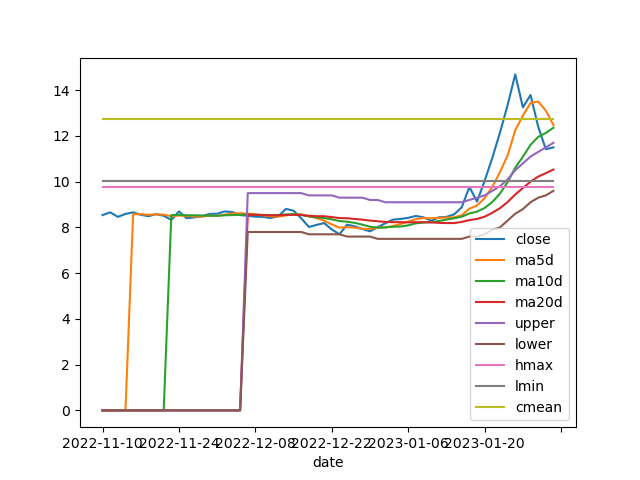

In [65]:
code
tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
# cname = tdd.get_sina_data_code(code)
# plt.title(
#     stock_code + " | " + cname + " | " + str(quotes.index[-1])[: 10],
#     fontsize=14)
tdf.loc[:, ["close", "ma5d", "ma10d", "ma20d",
            "upper", "lower", "hmax", 'lmin', 'cmean']].plot()

In [66]:
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
date,,,,,,,,,
2023-02-09,1.0,0.9,1.0,1.0,0.9,1.1,1.1,1.1,1.1


In [67]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
date,,,,,,,,,
2023-02-09,0.7,-8.0,-10.0,4.1,-9.8,10.0,10.0,10.0,10.0
